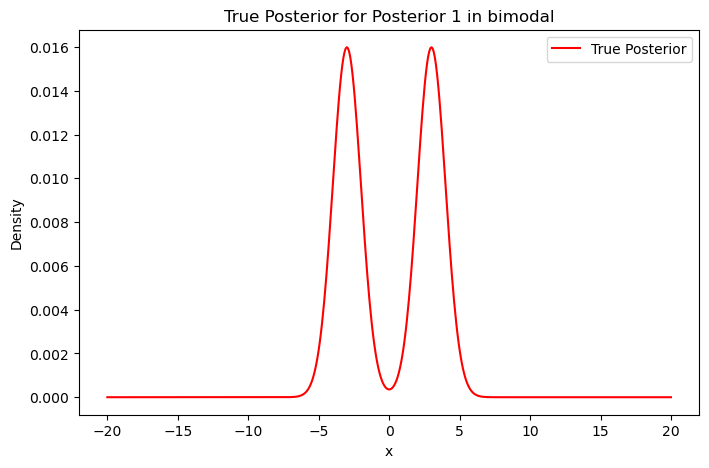

Sampling für Posterior 1 in Kategorie bimodal


Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [x]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 2 seconds.


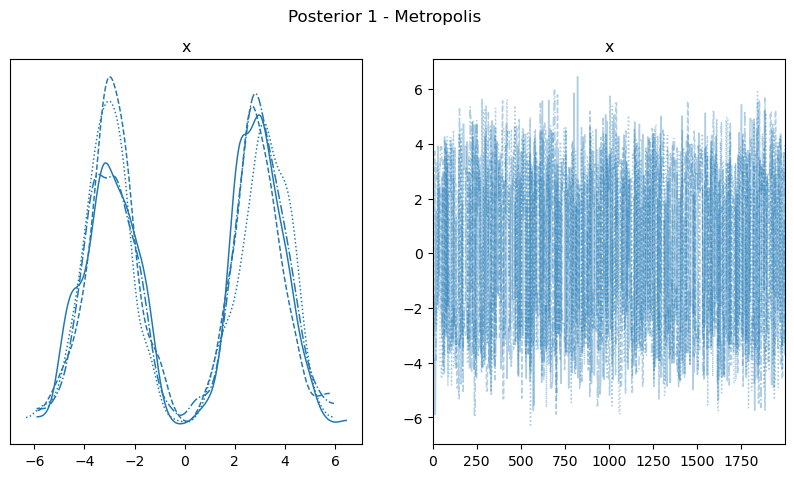

Population sampling (4 chains)
DEMetropolis: [x]
Attempting to parallelize chains to all cores. You can turn this off with `pm.sample(cores=1)`.
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 3 seconds.


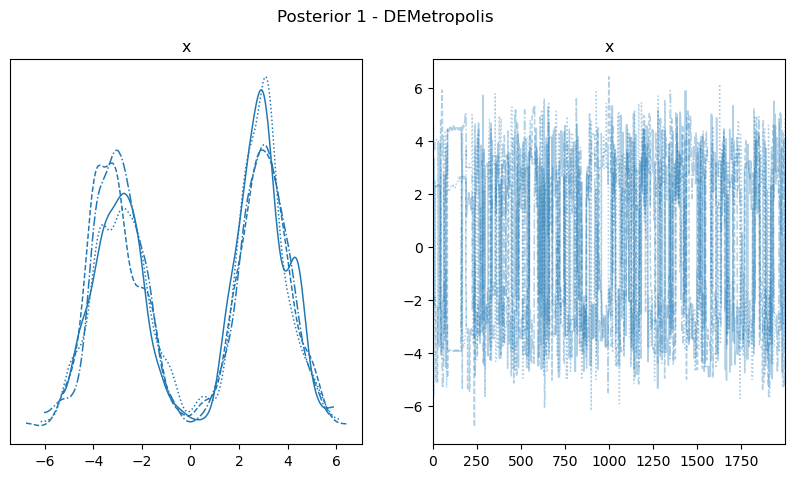

Multiprocess sampling (4 chains in 4 jobs)
NUTS: [x]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 2 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


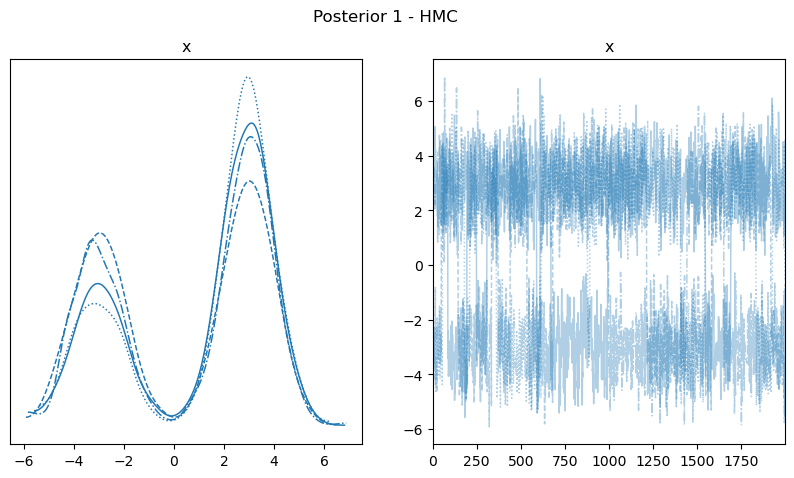

Initializing SMC sampler...
Sampling 6 chains in 6 jobs


/home/fabian/anaconda3/envs/pymc_immo_env/lib/python3.12/site-packages/arviz/data/base.py:265: UserWarning: More chains (6) than draws (3). Passed array should have shape (chains, draws, *shape)
  warnings.warn(


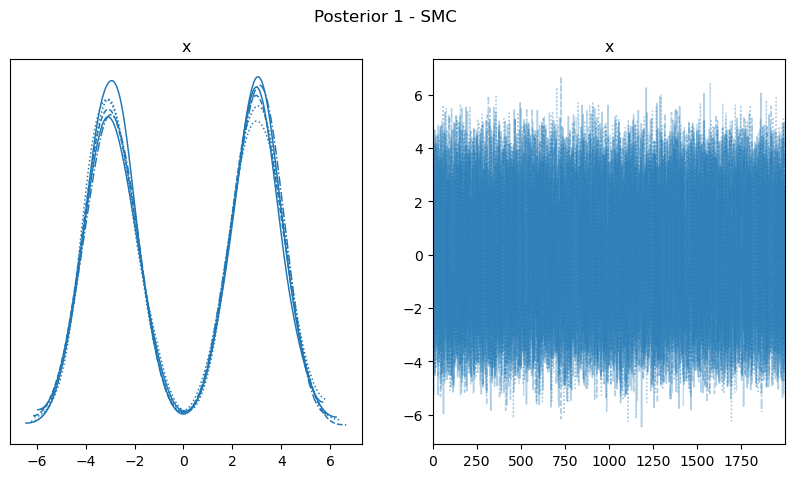

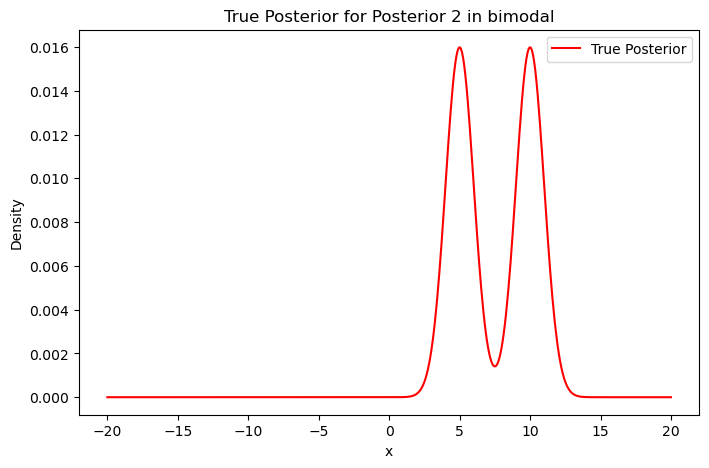

Sampling für Posterior 2 in Kategorie bimodal


Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [x]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 2 seconds.


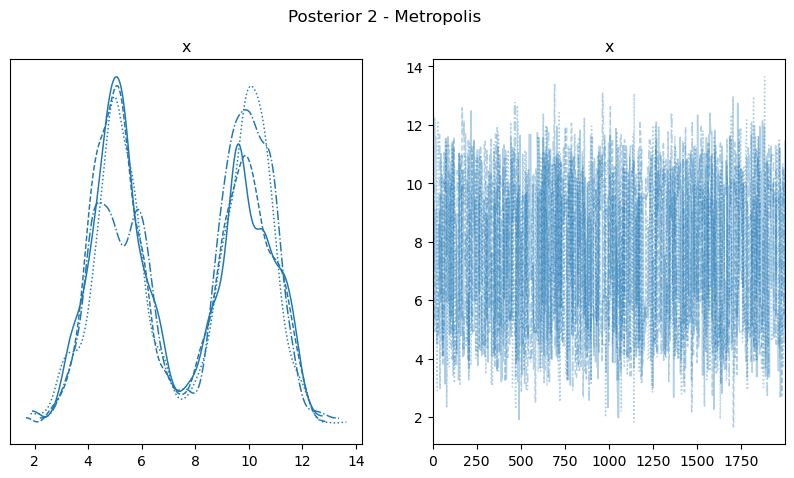

Population sampling (4 chains)
DEMetropolis: [x]
Attempting to parallelize chains to all cores. You can turn this off with `pm.sample(cores=1)`.
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 3 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details


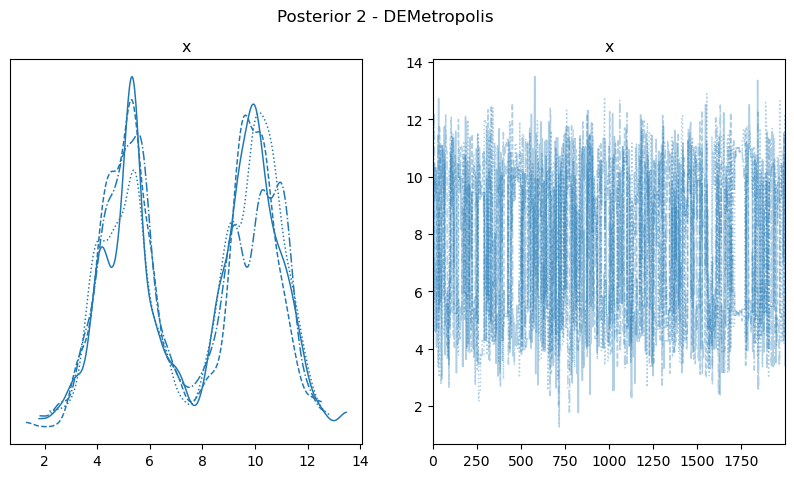

Multiprocess sampling (4 chains in 4 jobs)
NUTS: [x]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 2 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


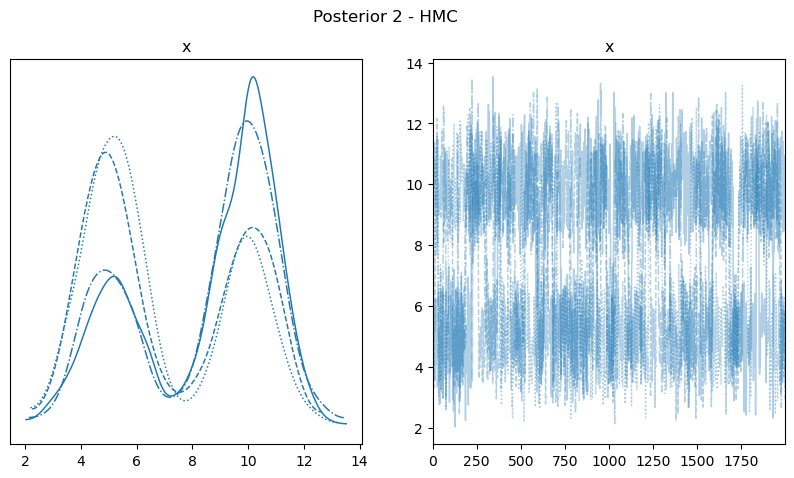

Initializing SMC sampler...
Sampling 6 chains in 6 jobs


/home/fabian/anaconda3/envs/pymc_immo_env/lib/python3.12/site-packages/arviz/data/base.py:265: UserWarning: More chains (6) than draws (3). Passed array should have shape (chains, draws, *shape)
  warnings.warn(


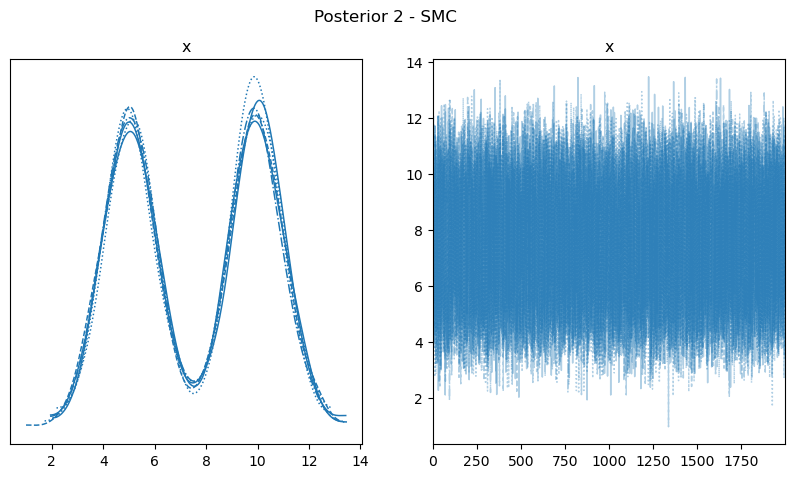

Diagnostik für Posterior_1:

Metropolis:
{'mean': {'x': 0.068}, 'sd': {'x': 3.186}, 'hdi_3%': {'x': -4.584}, 'hdi_97%': {'x': 4.561}, 'mcse_mean': {'x': 0.097}, 'mcse_sd': {'x': 0.069}, 'ess_bulk': {'x': 1236.0}, 'ess_tail': {'x': 1495.0}, 'r_hat': {'x': 1.0}}

DEMetropolis:
{'mean': {'x': 0.162}, 'sd': {'x': 3.183}, 'hdi_3%': {'x': -4.578}, 'hdi_97%': {'x': 4.599}, 'mcse_mean': {'x': 0.171}, 'mcse_sd': {'x': 0.121}, 'ess_bulk': {'x': 439.0}, 'ess_tail': {'x': 588.0}, 'r_hat': {'x': 1.01}}

HMC:
{'mean': {'x': 0.78}, 'sd': {'x': 3.055}, 'hdi_3%': {'x': -4.378}, 'hdi_97%': {'x': 4.607}, 'mcse_mean': {'x': 0.519}, 'mcse_sd': {'x': 0.37}, 'ess_bulk': {'x': 48.0}, 'ess_tail': {'x': 726.0}, 'r_hat': {'x': 1.1}}

SMC:
{'mean': {'x': 0.014}, 'sd': {'x': 3.158}, 'hdi_3%': {'x': -4.573}, 'hdi_97%': {'x': 4.505}, 'mcse_mean': {'x': 0.028}, 'mcse_sd': {'x': 0.021}, 'ess_bulk': {'x': 12317.0}, 'ess_tail': {'x': 12064.0}, 'r_hat': {'x': 1.0}}
Diagnostik für Posterior_2:

Metropolis:
{'mean': {'x': 

In [10]:
import pymc as pm
import numpy as np
import arviz as az
import matplotlib.pyplot as plt

# Framework für verschiedene Kategorien von Posteriors
class PosteriorFramework:
    def __init__(self):
        self.categories = {
            "unimodal": self._unimodal_posteriors,
            "bimodal": self._bimodal_posteriors,
            "symmetric": self._symmetric_posteriors,
            "asymmetric": self._asymmetric_posteriors
        }

    def _unimodal_posteriors(self):
        def posterior_1():
            with pm.Model() as model:
                x = pm.Normal("x", mu=0, sigma=1, initval=0)
                pm.Potential("likelihood", pm.logp(pm.Normal.dist(mu=0, sigma=1), x))
            return model

        def posterior_2():
            with pm.Model() as model:
                x = pm.Normal("x", mu=5, sigma=1, initval=5)
                pm.Potential("likelihood", pm.logp(pm.Normal.dist(mu=5, sigma=1), x))
            return model

        return [posterior_1, posterior_2]

    def _bimodal_posteriors(self):
        def posterior_1():
            def true_posterior(x):
                return np.exp(-0.5 * (x - 3) ** 2) + np.exp(-0.5 * (x + 3) ** 2)

            with pm.Model() as model:
                x = pm.Uniform("x", lower=-20, upper=20)  # Uniform prior to define domain
                pm.Potential("bimodal", np.log(true_posterior(x)))
            return model, true_posterior

        def posterior_2():
            def true_posterior(x):
                return np.exp(-0.5 * (x - 5) ** 2) + np.exp(-0.5 * (x - 10) ** 2)

            with pm.Model() as model:
                x = pm.Uniform("x", lower=-20, upper=20)  # Uniform prior to define domain
                pm.Potential("bimodal", np.log(true_posterior(x)))
            return model, true_posterior

        return [posterior_1, posterior_2]

    def _symmetric_posteriors(self):
        def posterior_1():
            def true_posterior(x):
                return np.exp(-0.5 * (x ** 2) / (2 ** 2))  # Approximating StudentT

            with pm.Model() as model:
                x = pm.StudentT("x", nu=5, mu=0, sigma=2, initval=0)
                pm.Potential("likelihood", pm.logp(pm.StudentT.dist(nu=5, mu=0, sigma=2), x))
            return model, true_posterior

        def posterior_2():
            def true_posterior(x):
                return np.exp(-0.5 * (x ** 2) / (3 ** 2))

            with pm.Model() as model:
                x = pm.Normal("x", mu=0, sigma=3, initval=0)
                pm.Potential("likelihood", pm.logp(pm.Normal.dist(mu=0, sigma=3), x))
            return model, true_posterior

        return [posterior_1, posterior_2]

    def _asymmetric_posteriors(self):
        def posterior_1():
            def true_posterior(x):
                return x ** (2 - 1) * np.exp(-x)  # Gamma distribution

            with pm.Model() as model:
                x = pm.Gamma("x", alpha=2, beta=1, initval=1.0)
                pm.Potential("likelihood", pm.logp(pm.Gamma.dist(alpha=2, beta=1), x))
            return model, true_posterior

        def posterior_2():
            def true_posterior(x):
                return np.exp(-x)

            with pm.Model() as model:
                x = pm.Exponential("x", lam=1, initval=1.0)
                pm.Potential("likelihood", pm.logp(pm.Exponential.dist(lam=1), x))
            return model, true_posterior

        return [posterior_1, posterior_2]

    def run_sampling(self, category):
        if category not in self.categories:
            raise ValueError("Kategorie nicht gefunden. Verfügbare Kategorien: unimodal, bimodal, symmetric, asymmetric")

        posteriors = self.categories[category]()
        diagnostics = {}

        for i, posterior in enumerate(posteriors):
            model_data = posterior()
            if isinstance(model_data, tuple):
                model, true_posterior = model_data
            else:
                model = model_data
                true_posterior = None

            if true_posterior:
                # Plot the true posterior before sampling
                x_vals = np.linspace(-20, 20, 500)
                y_vals = true_posterior(x_vals)
                y_vals /= y_vals.sum()  # Normalize

                plt.figure(figsize=(8, 5))
                plt.plot(x_vals, y_vals, color="red", label="True Posterior")
                plt.title(f"True Posterior for Posterior {i+1} in {category}")
                plt.xlabel("x")
                plt.ylabel("Density")
                plt.legend()
                plt.show()

            with model:
                print(f"Sampling für Posterior {i+1} in Kategorie {category}")

                methods = {
                    "Metropolis": pm.Metropolis(),
                    "DEMetropolis": pm.DEMetropolis(),
                    "HMC": pm.NUTS(),
                    "SMC": "smc"
                }

                traces = {}
                for method_name, sampler in methods.items():
                    if method_name == "SMC":
                        trace = pm.sample_smc(draws=2000, return_inferencedata=True, progressbar=False)
                    else:
                        trace = pm.sample(2000, tune=1000, step=sampler, return_inferencedata=True, progressbar=False)
                    traces[method_name] = trace
                    az.plot_trace(trace, figsize=(10, 5))
                    plt.suptitle(f"Posterior {i+1} - {method_name}")
                    plt.show()

                diagnostics[f"Posterior_{i+1}"] = {
                    method_name: az.summary(trace).to_dict() for method_name, trace in traces.items()
                }

        return diagnostics

# Framework instanziieren
framework = PosteriorFramework()

# Wähle eine Kategorie aus
category = "bimodal"  # Andere Optionen: unimodal, symmetric, asymmetric
diagnostics = framework.run_sampling(category)

# Vergleiche die Diagnostikwerte
for posterior, methods in diagnostics.items():
    print(f"Diagnostik für {posterior}:")
    for method, diag in methods.items():
        print(f"\n{method}:\n{diag}")


Sampling für Posterior 1 in Kategorie unimodal


Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [x]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1 seconds.


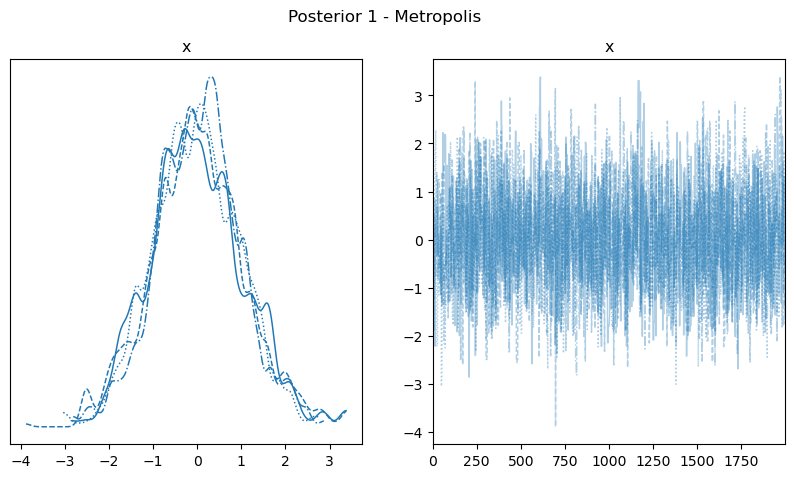

Population sampling (4 chains)
DEMetropolis: [x]
Attempting to parallelize chains to all cores. You can turn this off with `pm.sample(cores=1)`.
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 3 seconds.


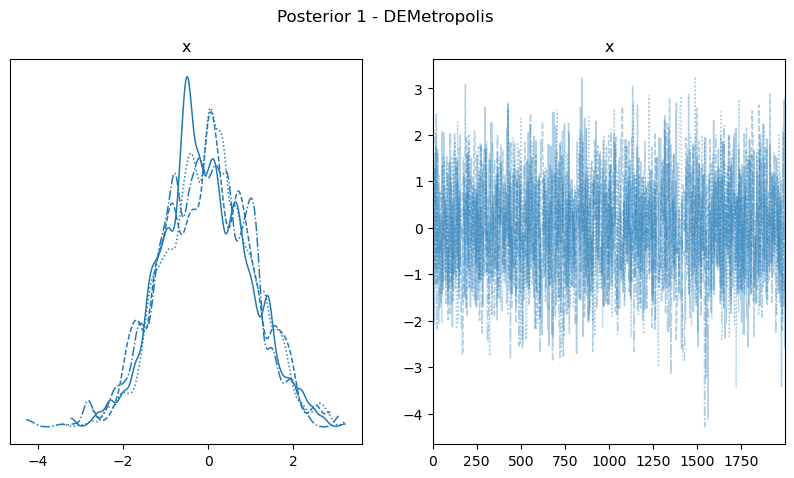

Multiprocess sampling (4 chains in 4 jobs)
NUTS: [x]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 2 seconds.


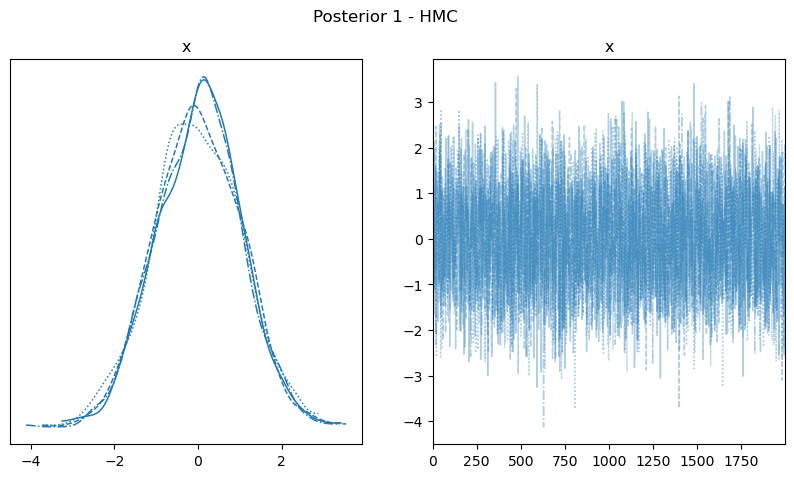

Sampling für Posterior 2 in Kategorie unimodal


Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [x]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1 seconds.


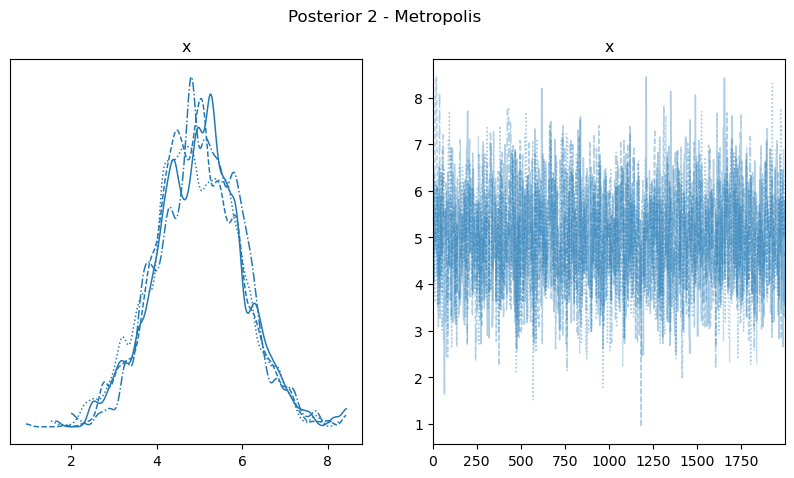

Population sampling (4 chains)
DEMetropolis: [x]
Attempting to parallelize chains to all cores. You can turn this off with `pm.sample(cores=1)`.
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 4 seconds.


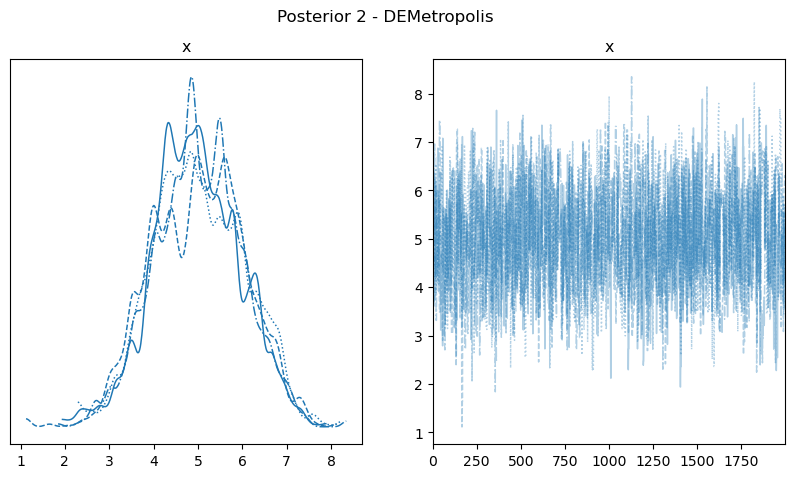

Multiprocess sampling (4 chains in 4 jobs)
NUTS: [x]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 2 seconds.


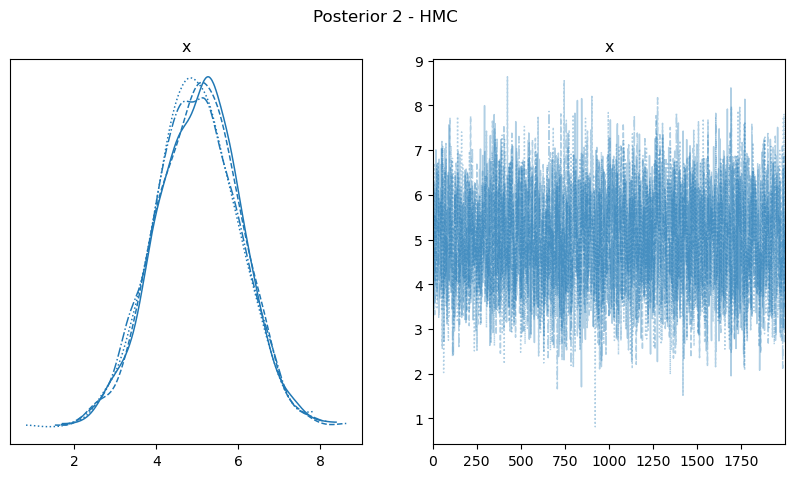

Diagnostik für Posterior_1:

Metropolis:
{'mean': {'x': 0.0}, 'sd': {'x': 0.999}, 'hdi_3%': {'x': -2.01}, 'hdi_97%': {'x': 1.77}, 'mcse_mean': {'x': 0.023}, 'mcse_sd': {'x': 0.019}, 'ess_bulk': {'x': 1981.0}, 'ess_tail': {'x': 1989.0}, 'r_hat': {'x': 1.0}}

DEMetropolis:
{'mean': {'x': -0.032}, 'sd': {'x': 1.028}, 'hdi_3%': {'x': -1.766}, 'hdi_97%': {'x': 2.013}, 'mcse_mean': {'x': 0.026}, 'mcse_sd': {'x': 0.019}, 'ess_bulk': {'x': 1622.0}, 'ess_tail': {'x': 1494.0}, 'r_hat': {'x': 1.0}}

HMC:
{'mean': {'x': 0.003}, 'sd': {'x': 1.019}, 'hdi_3%': {'x': -1.883}, 'hdi_97%': {'x': 1.945}, 'mcse_mean': {'x': 0.017}, 'mcse_sd': {'x': 0.012}, 'ess_bulk': {'x': 3498.0}, 'ess_tail': {'x': 5071.0}, 'r_hat': {'x': 1.0}}
Diagnostik für Posterior_2:

Metropolis:
{'mean': {'x': 4.973}, 'sd': {'x': 1.006}, 'hdi_3%': {'x': 3.07}, 'hdi_97%': {'x': 6.866}, 'mcse_mean': {'x': 0.026}, 'mcse_sd': {'x': 0.018}, 'ess_bulk': {'x': 1533.0}, 'ess_tail': {'x': 1784.0}, 'r_hat': {'x': 1.0}}

DEMetropolis:
{'mean'

In [8]:
import pymc as pm
import numpy as np
import arviz as az
import matplotlib.pyplot as plt

# Framework für verschiedene Kategorien von Posteriors
class PosteriorFramework:
    def __init__(self):
        self.categories = {
            "unimodal": self._unimodal_posteriors,
            "bimodal": self._bimodal_posteriors,
            "symmetric": self._symmetric_posteriors,
            "asymmetric": self._asymmetric_posteriors
        }

    def _unimodal_posteriors(self):
        def posterior_1():
            def logp(value):
                return pm.logp(pm.Normal.dist(mu=0, sigma=1), value)

            with pm.Model() as model:
                x = pm.CustomDist("x", logp=logp, shape=())
            return model

        def posterior_2():
            def logp(value):
                return pm.logp(pm.Normal.dist(mu=5, sigma=1), value)

            with pm.Model() as model:
                x = pm.CustomDist("x", logp=logp, shape=())
            return model

        return [posterior_1, posterior_2]

    def _bimodal_posteriors(self):
        def posterior_1():
            def logp(value):
                return np.log(np.exp(-0.5 * (value - 3) ** 2) + np.exp(-0.5 * (value + 3) ** 2))

            def true_posterior(x):
                return np.exp(-0.5 * (x - 3) ** 2) + np.exp(-0.5 * (x + 3) ** 2)

            with pm.Model() as model:
                x = pm.CustomDist("x", logp=logp, shape=())
            return model, true_posterior

        def posterior_2():
            def logp(value):
                return np.log(np.exp(-0.5 * (value - 5) ** 2) + np.exp(-0.5 * (value - 10) ** 2))

            def true_posterior(x):
                return np.exp(-0.5 * (x - 5) ** 2) + np.exp(-0.5 * (x - 10) ** 2)

            with pm.Model() as model:
                x = pm.CustomDist("x", logp=logp, shape=())
            return model, true_posterior

        return [posterior_1, posterior_2]

    def _symmetric_posteriors(self):
        def posterior_1():
            def logp(value):
                return pm.logp(pm.StudentT.dist(nu=5, mu=0, sigma=2), value)

            def true_posterior(x):
                return np.exp(-0.5 * (x ** 2) / (2 ** 2))

            with pm.Model() as model:
                x = pm.CustomDist("x", logp=logp, shape=(), initval=1.0)
            return model, true_posterior

        def posterior_2():
            def logp(value):
                return pm.logp(pm.Normal.dist(mu=0, sigma=3), value)

            def true_posterior(x):
                return np.exp(-0.5 * (x ** 2) / (3 ** 2))

            with pm.Model() as model:
                x = pm.CustomDist("x", logp=logp, shape=(), initval=1.0)
            return model, true_posterior

        return [posterior_1, posterior_2]

    def _asymmetric_posteriors(self):
        def posterior_1():
            def logp(value):
                return pm.logp(pm.Gamma.dist(alpha=2, beta=1), value)

            def true_posterior(x):
                return x ** (2 - 1) * np.exp(-x)

            with pm.Model() as model:
                x = pm.CustomDist("x", logp=logp, shape=(), initval=1.0)
            return model, true_posterior

        def posterior_2():
            def logp(value):
                return pm.logp(pm.Exponential.dist(lam=1), value)

            def true_posterior(x):
                return np.exp(-x)

            with pm.Model() as model:
                x = pm.CustomDist("x", logp=logp, shape=(), initval=1.0)
            return model, true_posterior

        return [posterior_1, posterior_2]

    def run_sampling(self, category):
        if category not in self.categories:
            raise ValueError("Kategorie nicht gefunden. Verfügbare Kategorien: unimodal, bimodal, symmetric, asymmetric")

        posteriors = self.categories[category]()
        diagnostics = {}

        for i, posterior in enumerate(posteriors):
            model_data = posterior()
            if isinstance(model_data, tuple):
                model, true_posterior = model_data
            else:
                model = model_data
                true_posterior = None

            if true_posterior:
                # Plot the true posterior before sampling
                x_vals = np.linspace(-20, 20, 500)
                y_vals = true_posterior(x_vals)
                y_vals /= y_vals.sum()  # Normalize

                plt.figure(figsize=(8, 5))
                plt.plot(x_vals, y_vals, color="red", label="True Posterior")
                plt.title(f"True Posterior for Posterior {i+1} in {category}")
                plt.xlabel("x")
                plt.ylabel("Density")
                plt.legend()
                plt.show()

            with model:
                print(f"Sampling für Posterior {i+1} in Kategorie {category}")

                methods = {
                    "Metropolis": pm.Metropolis(),
                    "DEMetropolis": pm.DEMetropolis(),
                    "HMC": pm.NUTS(),
                    #"SMC": "smc"
                }

                traces = {}
                for method_name, sampler in methods.items():
                    if method_name == "SMC":
                        trace = pm.sample_smc(draws=2000, return_inferencedata=True, progressbar=False)
                    else:
                        trace = pm.sample(2000, tune=1000, step=sampler, return_inferencedata=True, progressbar=False)
                    traces[method_name] = trace
                    az.plot_trace(trace, figsize=(10, 5))
                    plt.suptitle(f"Posterior {i+1} - {method_name}")
                    plt.show()

                diagnostics[f"Posterior_{i+1}"] = {
                    method_name: az.summary(trace).to_dict() for method_name, trace in traces.items()
                }

        return diagnostics

# Framework instanziieren
framework = PosteriorFramework()

# Wähle eine Kategorie aus
category = "unimodal"  # Andere Optionen: unimodal, symmetric, asymmetric
diagnostics = framework.run_sampling(category)

# Vergleiche die Diagnostikwerte
for posterior, methods in diagnostics.items():
    print(f"Diagnostik für {posterior}:")
    for method, diag in methods.items():
        print(f"\n{method}:\n{diag}")
